# Part 3: modelisation

Lino Galiana  
2025-10-06

> **Skills you will acquire in this chapter**
>
> -   Understand the central role of modeling in statistics and machine learning, especially in moving beyond simple description to inference  
> -   Distinguish between key concepts such as supervised vs. unsupervised learning, classification vs. regression, and traditional vs. deep learning  
> -   Recognize the limitations of complex models (like large neural networks), including their data and resource demands, and know when to opt for simpler alternatives  
> -   Appreciate the effectiveness of classic, well-established algorithms (e.g. SVM, regression, clustering, decision trees, random forests) that can be easily applied using Scikit-Learn to begin a machine learning workflow

# 1. Introduction

It is common to associate data scientists with the idea of complex artificial intelligence models.
The popular success of tools like `ChatGPT` contributes to this perception. However, modeling is generally only a phase of a data scientist’s work, similar to visualization. In some organizations with more specialized divisions of labor, data engineers are as involved in the modeling phase as data scientists.

It is a common misconception, especially among newcomers, to think that the data scientist’s work can be reduced exclusively to the modeling phase. This phase heavily depends on the quality of the data cleaning and structuring work done beforehand. Implementing complex models that can handle unstructured data is resource-intensive and costly. Only a limited number of players can train large language models[1] *ex nihilo* by spending at least \$300,000 to train a model, even before any inference phase (Izsak, Berchansky, and Levy 2021). These computational needs for training large language models are also quite energy-intensive, which can lead to significant carbon footprints (Strubell, Ganesh, and McCallum 2019; Arcep 2019).

Fortunately, it is possible to implement lighter models, which we will introduce in the coming chapters.
This part of the course will primarily focus on presenting machine learning algorithms. We can define machine learning broadly as a set of techniques that enable algorithms to detect structures or statistical regularities from a set of observations without these structures being defined *a priori* by modelers. This definition helps differentiate this approach from other fields of artificial intelligence, particularly symbolic AI, where each observation is characterized by an exhaustive and predefined setof rules.
Although this broad definition encompasses traditional inferential statistics, it still highlights the major philosophical difference between machine learning and econometrics, as we will discuss later.

> **How to define artificial intelligence?**
>
> 👈️ **Artifical intelligence**
>
> Russell and Norvig (2020) defines artificial intelligence as follows:
>
> > “The study of \[intelligent\] agents that receive precepts from the environment and take action. Each such agent is implemented by a function that maps percepts to actions, and we cover different ways to represent these functions, such as production systems, reactive agents, logical planners, neural networks, and decision-theoretic systems”
>
> This very broad definition includes many different approaches within the field of artificial intelligence. It defines artificial intelligence as a very generic decision rule derived from data. Mathematically, this means linking perceptions $\mathbb{X}$—facts considered given—to a decision $y$ through a decision rule $f$: $y=f(\mathbb{X})$ (where decision $y$ comes from a set of decisions, either restricted or broad, depending on the phenomenon, noted as $\mathcal{Y}$). The way this function $f$ is constructed distinguishes different fields of artificial intelligence.
>
> The European AI Act of 2024 offers a [similar definition](https://artificialintelligenceact.eu/fr/article/3/) though expressed in different terms:
>
> > “A machine-based system designed to operate with varying levels of autonomy and adaptability after deployment, which, for explicit or implicit purposes, deduces from the data it receives how to generate results such as predictions, content, recommendations, or decisions that can influence physical or virtual environments.”
>
> In this course, we will only discuss approaches built around learning—those that aim to induce necessarily uncertain rules from a dataset. This approach is very different from [symbolic AI](https://fr.wikipedia.org/wiki/Intelligence_artificielle_symbolique), which offers limited autonomy to the machine since its behavior is constrained by a set, sometimes large, of deterministic rules.

The choice to focus on simple machine learning algorithms in the modeling section, rather than directly jumping into neural networks, first allows us to present the scientific approach related to learning, especially to achieve satisfactory performance when extrapolating to data not encountered during the training phase.
This also highlights issues that are relevant even for more complex models, such as data preparation to reduce noise in the data, enabling models to extract more reliable structures from the data. In fact, to be more effective than more parsimonious approaches, deep learning techniques, particularly neural networks, require either very large volumes of data (millions or tens of millions of observations) or complex-structured data, such as natural language or images.
In many cases, simpler models, such as machine learning techniques, are more than sufficient.

# 2. Modeling: An Approach at the Heart of Statistics

A statistical model is a simplified and structured representation of a real phenomenon, built from observations drawn from a partial dataset.

👈️ **Statistical model**

A model aims to capture relationships and underlying structures within this data, allowing for hypothesis formulation, making predictions, and extrapolating conclusions beyond the measured dataset.
Statistical models thus provide an analytical framework to explore, understand, and interpret the information contained in the data.

Representing reality as a model is a foundational principle in statistics as a scientific discipline, with applications across many fields: economics, sociology, geography, biology, physics, and more. The specific term may vary depending on the discipline, but the scientific approach is typically consistent: the modeler establishes relationships between several theoretical variables with empirical counterparts to quantify the relationship between them. This approach is central to **inferential statistics**, as opposed to **descriptive statistics**.
In both cases, the objective is to use a **sample**, a limited set of observed data, to better understand a **population**, the entire dataset relevant to a study. The difference between the two approaches lies in how this extrapolation is conducted. In inferential statistics, the goal is generally to infer general laws, with statistical uncertainty margins, from observed data, whether it is about the statistical distribution of a variable (univariate statistics) or relationships between multiple variables. Descriptive statistics, on the other hand, simply summarize information within a dataset, often through distribution moments (mean, quantiles, etc.), without aiming to provide a general explanation of the data-generating process.

👈️ **Inferential statistics, descriptive statistics, sample, population**

These two approaches are not mutually exclusive; rather, they are complementary. Attempting an inferential approach without a thorough descriptive analysis often leads to dead ends or unreliable conclusions. Inferential analysis can also enrich a descriptive analysis by allowing information to be prioritized within a dataset, guiding descriptive work by focusing on key findings.

In economic research, empirical models are generally used to associate specific structural parameters of economic behavior models with quantitative values.
Statistical models, like economic models, always contain an element of unreality (Friedman 1953; Salmon 2010), and accepting a model’s implications too literally, even if it has strong predictive performance, can be risky and reflect a scientific bias. Rather than identifying the true data-generating process, the goal is to select the least inaccurate model.

At ENSAE, empirical modeling is primarily seen in two application areas: machine learning and econometrics. The distinction is largely semantic—a linear regression can be considered either a machine learning or econometric technique—but also conceptual:

-   In machine learning, the structure imposed by the modeler is minimal, and algorithms, based on statistical performance criteria, help select a mathematical rule that best fits the data.
-   In econometrics, the assumptions about the structure of laws are stronger (even in semi or non-parametric frameworks) and are more often imposed by the modeler.

In this part of the course, we will focus mainly on machine learning, as it offers a more practical perspective than econometrics, which is more directly associated with complex statistical concepts like asymptotic theory.

The adoption of machine learning in economic literature has been gradual, as data structuring often serves as the empirical counterpart of theoretical hypotheses regarding actor or market behavior (Athey and Imbens 2019; Charpentier, Flachaire, and Ly 2018).
To simplify, econometrics focuses on understanding the causality of certain variables on another. This implies that what matters to the econometrician is primarily the estimation of parameters (and the uncertainty around them) that quantify the effect of one variable on another.
Again, to simplify, machine learning focuses on a predictive objective, exploiting correlations between variables.
From this perspective, causality is less important than knowing that a variation in one variable of $x$% can predict a change of $\beta x$ in the target variable; the reason is irrelevant.
Mullainathan and Spiess (2017), for simplicity, proposed this fundamental difference: econometrics concerns itself with $\widehat{\beta}$, while machine learning focuses on $\widehat{y}$. Both are, of course, connected in a linear framework, but this difference in approach has important implications for the structure of the models studied, particularly their parsimony[2].

# 3. Some useful definitions

In this part of the course, we will use several terms familiar to machine learning practitioners, but which need to be clarified to understand the following chapters.

## 3.1 Training and inference

Machine learning is an operational approach: the objective is generally to estimate relationships between observed variables to create a decision rule, which can then be extrapolated to another data sample. The next two chapters aim to present the scientific approach for achieving high-quality extrapolation.

Training (or learning) is the phase where a machine learning model refines relationships based on a dataset. Analogous to human learning, it is the phase where machine learning “studies” before an exam.

👈️ **Training, learning**

Inference is the phase where the decision rule is applied to new data, unseen during training. To continue the previous analogy, it could involve new questions on the exam (evaluation phase) or the application of the learned knowledge to real-world situations.

👈️ **Inference**

## 3.2 Machine learning and deep learning

Up to this point, we have frequently used, without defining it, the concept of machine learning.

Machine learning is a set of algorithmic techniques that allow computers to learn from examples and adjust a model without being explicitly defined. Through iterative algorithms and a performance metric, classification or prediction rules make it possible to relate features with a target variable (*label*)[3].

👈️ **Machine learning, label, features**

There are many algorithms that differ in how they introduce a more or less formal structure into the relationship between observed variables. We will cover only a few of these algorithms: support vector machine (SVM), logistic regression, decision trees, random forests, etc. Simple to implement using the `Scikit-Learn` library, they will provide an understanding of the original approach to machine learning, which can be further explored later.

Within the broad family of machine learning algorithms, neural network techniques are increasingly becoming more autonomous. Techniques based on neural networks are grouped within a family called deep learning.
These networks are inspired by the functioning of the human brain and are composed of many interconnected layers of neurons. The well-known canonical structure is illustrated in **?@fig-nn**.
Deep learning is useful for creating models capable of learning complex and abstract data representations from raw data, sometimes bypassing the complex task of manually defining specific features to target.
The fields of image analysis (*computer vision*) or natural language processing are the main application areas for these methods.

👈️ **Deep learning, neural networks**

> **Example of a simplified neural network structure.**
>
> 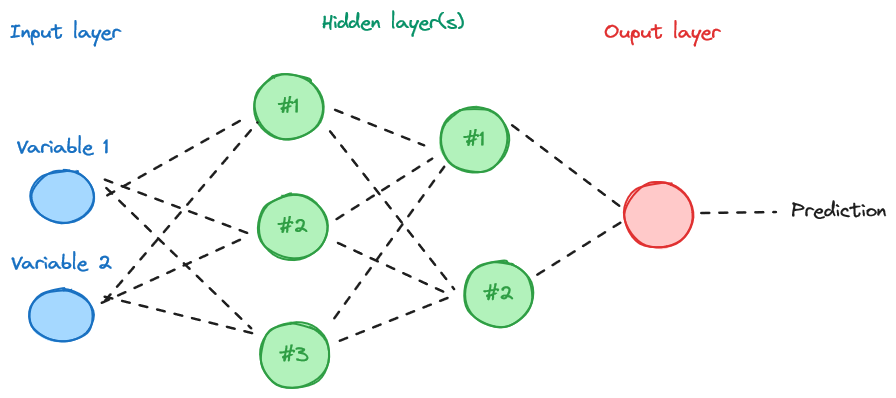
>
> The first layer (*input layer*) corresponds to the variables introduced into the model. These are combined in intermediate layers (*hidden layer*). The transition between two layers is achieved through an activation function, such as a *[sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function)* function, constructed from a weighted average (with weights adjusted during training) of the previous layers. The complexity of the network implemented, as well as the relationships between layers, determines the type of network used (feed forward network, convolutional network…).
>
> Neural networks are complex models. With large and complex datasets, they can be heavy, even impossible to train on standard machines. If the data matches what the model expects, it is quite possible to use it for inference without retraining or by implementing marginal learning, known as [fine-tuning](https://en.wikipedia.org/wiki/Fine-tuning_(deep_learning)). To extend the analogy with human learning, fine-tuning is similar to updating one’s knowledge with a new lesson before an exam. It isn’t necessary to relearn everything, only to refine knowledge with the latest course content.
>
> 👈️ ***Fine tuning***
>
> A large number of pretrained models are available on `HuggingFace`, a
> platform for sharing *deep learning* models (the `Github` of *deep learning*). `HuggingFace` also offers courses on the subject, notably on [natural language processing (NLP)](https://huggingface.co/learn/nlp-course/chapter1/2?fw=pt). We’ll be looking at natural language processing in the [next part](../../content/NLP/index.qmd) of this course, but in a more modest way, going back over the concepts necessary before implementing sophisticated language modeling.

In this part of the course, we will not delve deeply into deep learning because these models, to be effective, require either large structured datasets, which are rarely available as open data and have complex variable relationships, or unstructured data such as text, images, videos, etc. Text data will be covered in the next part of the course, as they involve specific concepts that require an understanding of structured data modeling challenges.

## 3.3 Supervised and unsupervised learning

An important dividing line between methods is whether or not we observe the label (the variable $y$) to be modeled.

Take, for example, an e-commerce site that has information on its customers such as age, gender, and place of residence.
This site may want to leverage this information in different ways to model purchasing behavior.

First, the site may wish to predict the purchase volume of a new customer with certain characteristics.
In this case, it is possible to use the amounts spent by other customers based on their characteristics. Information for our new customer is not measured, but it can be inferred from a set of similar observations.

However, it is entirely possible to train a model on an unobserved *label*, assuming it makes sense. For instance, our e-commerce site may wish to determine, based on the characteristics of our new customer and its existing customer base, whether they belong to a specific group of consumers: big spenders, frugal shoppers, etc. Of course, we never know *a priori* which group a consumer belongs to, but grouping customers with similar behaviors will give meaning to this categorization. In this case, the algorithm will learn to recognize which characteristics are structuring for grouping consumers with similar behavior, allowing any new customer to be associated with a group.

These two examples illustrate the different approaches depending on whether we attempt to build models on an observed *label* or not. This distinction represents one of the fundamental dualities in machine learning techniques:

👈️ **Supervised learning, unsupervised learning**

-   **Supervised learning**: the target value is known and can be used to evaluate the model’s quality;
-   **Unsupervised learning**: the target value is unknown, and statistical criteria are used to select the most plausible data structure.

This part of the course will illustrate these two approaches using the same dataset: the results of U.S. elections.
In the supervised learning case, we will aim to directly model the election candidates’ results (either the score or the winner). In the unsupervised learning case, we will try to group territories with similar voting behavior based on socio-demographic factors.

## 3.4 Classification and Regression

A second fundamental distinction that determines the choice of machine learning method to implement is the nature of the *label*. Is it a continuous variable or a discrete variable, meaning it takes a limited number of categories?

This difference in data type leads to two types of approaches:

👈️ **Classification, regression**

-   In **classification** tasks, where our label $y$ has a finite number of values[4], we aim to predict the class or group to which our data belongs.
    For example, if you have coffee in the morning, are you part of the group of grumpy morning people?
    Performance metrics typically use the proportion of correct or incorrect classifications to assess model quality.
-   In **regression** tasks, where our label is a numerical value, we seek to directly predict the value of our variable in the model. For instance, given a certain age, what would be your daily expenditure on fast food? Performance metrics are usually averages of the differences between the prediction and the observed value, often with varying degrees of sophistication.

In summary, the following cheat sheet, taken from `Scikit-Learn` documentation, provides an initial overview of the different model families:

<figure id="fig-algos-scikit">
<img src="https://scikit-learn.org/stable/_downloads/b82bf6cd7438a351f19fac60fbc0d927/ml_map.svg" />
<figcaption>Figure 3.1: A cheatsheet of algorithms available in <a href="https://scikit-learn.org"><code>Scikit-Learn</code></a></figcaption>
</figure>

# 4. Data

In this section, we will focus on electoral science. This branch of research lies at the interface between political science, sociology, economics and geography. Its birth certificate is Siegfried (1913)’s *Tableau de la France de l’ouest*, a work known for certain conclusions, the best-known of which is *“limestone votes left, granite right”*. More recently, the debates surrounding Piketty and Cagé (2023), mobilizing multiple data from French *open data*, demonstrate the interest of data science in understanding a real phenomenon, namely the determinants of voting.

Most examples in this section are based on the 2020 U.S. election results at the county level. Several datasets are used for this purpose:

-   Election data is a reconstruction from the *MIT Election Lab* data, available on `Github` by [`tonmcg`](https://github.com/tonmcg/US_County_Level_Election_Results_08-20) or directly on the *[MIT Election Lab website](https://electionlab.mit.edu/data)*.
-   Socioeconomic data (population, income and poverty data, unemployment rate, education variables) come from the USDA ([source](https://www.ers.usda.gov/data-products/county-level-data-sets/)).
-   The shapefile used for the maps comes from the Census Bureau data. The file can be downloaded directly from this URL:
    <https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_20m.zip>

The code to build a single database from these various sources is shown below, for those interested:

[1] We will periodically revisit the principle of large language models, which have become central in the data science ecosystem within just a few years and are also becoming popular tools for the general public, like `ChatGPT`.

[2] As we said, this differentiation is a bit of a caricature, especially now that economists are more familiar with the concepts of predictive performance on learning and test subsets (but this is a slow evolution). Conversely, research in *machine learning* is very dynamic on the question of the explicability and interpretability of *machine learning* models, notably around the concept of
[Shapley values](https://shap.readthedocs.io/en/latest/index.html). Nevertheless, this philosophical difference between these two schools of thought continues to influence the way econometrics or machine learning is practiced in different scientific fields.

[3] Drawing an analogy with econometrics, features are explanatory variables or *covariates* (the matrix $X$), and label is the explained variable ($y$).

[4] We will focus on the simplest binary case. In this type of problem, the variable $y$ has two categories: winner-loser, 0-1, yes-no… However, there are many use cases where the variable has more categories, such as satisfaction scores ranging from 0 to 5 or A to D. Implementing these models is more complex, but the general approach often involves breaking it down into a set of binary models to enable the use of simple and stable metrics.

<details>

<summary>

View code for data retrieval

</summary>

``` python
import urllib
import urllib.request
import os
import zipfile
from urllib.request import Request, urlopen
from pathlib import Path
import numpy as np
import pandas as pd
import geopandas as gpd


def download_url(url, save_path):
    with urllib.request.urlopen(url) as dl_file:
        with open(save_path, "wb") as out_file:
            out_file.write(dl_file.read())


def create_votes_dataframes():
    
    Path("data").mkdir(parents=True, exist_ok=True)

    # Backup de "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_20m.zip",
    download_url(
        "https://minio.lab.sspcloud.fr/lgaliana/data/python-ENSAE/shapefile_county_us_2019.zip",
        "data/shapefile",
    )

    with zipfile.ZipFile("data/shapefile", "r") as zip_ref:
        zip_ref.extractall("data/counties")

    shp = gpd.read_file("data/counties/cb_2019_us_county_20m.shp")
    shp = shp[~shp["STATEFP"].isin(["02", "69", "66", "78", "60", "72", "15"])]
    shp

    df_election = pd.read_csv(
        "https://raw.githubusercontent.com/tonmcg/US_County_Level_Election_Results_08-20/master/2020_US_County_Level_Presidential_Results.csv"
    )
    df_election.head(2)
    population = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/PopulationEstimates.xlsx?v=85724",
        header=4,
    ).rename(columns={"FIPStxt": "FIPS"})
    education = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/Education.xlsx?v=34502",
        header=3,
    ).rename(columns={"FIPS Code": "FIPS", "Area name": "Area_Name"})
    unemployment = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/Unemployment.xlsx?v=35579",
        header=4,
    ).rename(columns={"FIPS_Code": "FIPS", "area_name": "Area_Name", "Stabr": "State"})
    income = pd.read_excel(
        "https://ers.usda.gov/sites/default/files/_laserfiche/DataFiles/48747/PovertyEstimates.xlsx?v=36737",
        header=4,
    ).rename(columns={"FIPS_Code": "FIPS", "Stabr": "State", "Area_name": "Area_Name"})

    dfs = [
        df.set_index(["FIPS", "State"])
        for df in [population, education, unemployment, income]
    ]
    data_county = pd.concat(dfs, axis=1)
    df_election = df_election.merge(
        data_county.reset_index(), left_on="county_fips", right_on="FIPS"
    )
    df_election["county_fips"] = df_election["county_fips"].astype(str).str.lstrip("0")
    shp["FIPS"] = shp["GEOID"].astype(str).str.lstrip("0")
    votes = shp.merge(df_election, left_on="FIPS", right_on="county_fips")

    req = Request(
        "https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false"
    )
    req.add_header(
        "User-Agent",
        "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0",
    )
    content = urlopen(req)
    df_historical = pd.read_csv(content, sep="\t")
    # df_historical = pd.read_csv('https://dataverse.harvard.edu/api/access/datafile/3641280?gbrecs=false', sep = "\t")

    df_historical = df_historical.dropna(subset=["FIPS"])
    df_historical["FIPS"] = df_historical["FIPS"].astype(int)
    df_historical["share"] = (
        df_historical["candidatevotes"] / df_historical["totalvotes"]
    )
    df_historical = df_historical[["year", "FIPS", "party", "candidatevotes", "share"]]
    df_historical["party"] = df_historical["party"].fillna("other")

    df_historical_wide = df_historical.pivot_table(
        index="FIPS", values=["candidatevotes", "share"], columns=["year", "party"]
    )
    df_historical_wide.columns = [
        "_".join(map(str, s)) for s in df_historical_wide.columns.values
    ]
    df_historical_wide = df_historical_wide.reset_index()
    df_historical_wide["FIPS"] = df_historical_wide["FIPS"].astype(str).str.lstrip("0")
    votes["FIPS"] = votes["GEOID"].astype(str).str.lstrip("0")
    votes = votes.merge(df_historical_wide, on="FIPS")
    votes["winner"] = np.where(
        votes["votes_gop"] > votes["votes_dem"], "republican", "democrats"
    )

    return votes
```

</details>

This section is by no means exhaustive. It serves as an entry point into modeling, based on a series of examples developed around a common theme. For those wishing to learn more about econometric models which will be discussed less than machine learning models, I recommend reading Turrell and contributors (2021). As far as *machine learning* is concerned, James et al. (2023) is quite exhaustive and useful to consult.

# 5. Going further

This section is an introduction to machine learning. It does not cover recent research areas, among which we can highlight:

👈️ **Interpretability, conformal prediction, bayesian methods**

1.  **Interpretability**: a set of methods aimed at opening up the black box of machine learning models. This includes techniques that help to better understand how a model, given certain inputs, arrives at a prediction. Popular methods today include [LIME](https://christophm.github.io/interpretable-ml-book/lime.html) and [Shapley values](https://christophm.github.io/interpretable-ml-book/shap.html). For more information, a good starting point is Christoph (2020).
2.  **Conformal Prediction**: a statistical approach that provides an estimate of the uncertainty of a prediction by generating confidence intervals for each individual prediction. It guarantees a predetermined accuracy level, helping to deliver reliable and understandable predictions. For further reading, refer to the technical article by Angelopoulos and Bates (2021).
3.  **Bayesian methods**: a set of methods which introduce uncertainty into parameter estimation, and update this uncertainty on the basis of observed data. These methods are frequently used in a statistical context, where flexibility is nevertheless required with regard to modeling assumptions. They have been popularized by the popular book Silver (2012) (creator of *[fivethirtyeight](https://projects.fivethirtyeight.com/) website*), which presents several applications (sports forecasts, elections, etc.) and are the subject of several dedicated courses at ENSAE, notably the third-year *Monte Carlo Markov Chain* (MCMC) course. Nevertheless, we will occasionally refer to this family of methods, in particular when we present Bayes’ naive classifier.

To take your first steps in modeling, particularly data *preprocessing*, you can also check out topic 3 of a hackathon organized by Insee in 2023, *Exploring the eating habits of the French*, on the [SSP Cloud](https://www.sspcloud.fr/formation?search=funath&path=%5B%22Funathon%202023%22%5D) or on [Github](https://github.com/InseeFrLab/funathon2023_sujet3/).

The aim of the topic is to work on food consumption and habits data from the INCA 3 study. You will work on several themes:

-   Exploratory data analysis and visualization
-   Clustering of individuals: from pre-processing to classical unsupervised learning methods (PCA, K-means, Hierarchical Ascending Clustering)
-   BMI prediction: first steps towards supervised learning methods and associated *preprocessings*.

## References

Angelopoulos, Anastasios N, and Stephen Bates. 2021. “A Gentle Introduction to Conformal Prediction and Distribution-Free Uncertainty Quantification.” *arXiv Preprint arXiv:2107.07511*.

Arcep. 2019. “L’empreinte Carbone Du Numérique.” *Rapport de l’Arcep*.

Athey, Susan, and Guido W Imbens. 2019. “Machine Learning Methods That Economists Should Know About.” *Annual Review of Economics* 11: 685–725.

Charpentier, Arthur, Emmanuel Flachaire, and Antoine Ly. 2018. “Econometrics and Machine Learning.” *Economie Et Statistique* 505 (1): 147–69.

Christoph, Molnar. 2020. *Interpretable Machine Learning: A Guide for Making Black Box Models Explainable*. Leanpub.

Friedman, Milton. 1953. “The Methodology of Positive Economics.” In *Essays in Positive Economics*. Chicago: The University of Chicago Press.

Izsak, Peter, Moshe Berchansky, and Omer Levy. 2021. “How to Train BERT with an Academic Budget.” <https://arxiv.org/abs/2104.07705>.

James, Gareth, Daniela Witten, Trevor Hastie, Robert Tibshirani, and Jonathan Taylor. 2023. “Statistical Learning.” In *An Introduction to Statistical Learning: With Applications in Python*, 15–67. Springer.

Mullainathan, Sendhil, and Jann Spiess. 2017. “Machine Learning: An Applied Econometric Approach.” *Journal of Economic Perspectives* 31 (2): 87–106. <https://doi.org/10.1257/jep.31.2.87>.

Piketty, Thomas, and Julia Cagé. 2023. *Une Histoire Du Conflit Politique: Elections Et inégalités Sociales En France, 1789-2022*. Seuil.

Russell, Stuart J., and Peter Norvig. 2020. *Artificial Intelligence: A Modern Approach (4th Edition)*. Pearson. <http://aima.cs.berkeley.edu/>.

Salmon, Pierre. 2010. “Le Problème Du réalisme Des Hypothèses En <span class="nocase">é</span>conomie Politique.”

Siegfried, André. 1913. *Tableau Politique de La France de l’ouest Sous La Troisième république: 102 Cartes Et Croquis, 1 Carte Hors Texte*. A. Colin.

Silver, Nate. 2012. *The Signal and the Noise: Why so Many Predictions Fail-but Some Don’t*. Penguin.

Strubell, Emma, Ananya Ganesh, and Andrew McCallum. 2019. “Energy and Policy Considerations for Deep Learning in NLP.” <https://arxiv.org/abs/1906.02243>.

Turrell, Arthur, and contributors. 2021. *Coding for Economists*. Online. <https://aeturrell.github.io/coding-for-economists>.